In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import missingno as msno
import plotly.express as px
pd.set_option('display.max_columns', 30)

data_types = {
    "Room(s)": str,
    "Parking": str,
    "Master Project": str,
    "Project": str,
}

tx_data = pd.read_csv("data/transactions.csv", delimiter=';', dtype=data_types, parse_dates=["Transaction Date"])

In [3]:
#msno.bar(tx_data)

In [39]:
#msno.matrix(tx_data)

In [40]:
#tx_data.info()

In [2]:
tx_data['Property Size (sq.m)'] = tx_data['Property Size (sq.m)'].fillna(tx_data['Transaction Size (sq.m)'])
tx_data['Transaction Size (sq.m)'] = tx_data['Transaction Size (sq.m)'].fillna(tx_data["Property Size (sq.m)"])
tx_data['No. of Buyer'] = tx_data['No. of Buyer'].fillna(0).astype(int)
tx_data['No. of Seller'] = tx_data['No. of Seller'].fillna(0).astype(int)

for x in tx_data.columns:
    tx_data[x]=tx_data[x].fillna("N/A")

In [3]:
#tx_data.info()

In [4]:
tx_data['date'] = tx_data['Transaction Date'].astype(int)

# Data exploration

In [44]:
#tx_data

In [45]:
#tx_data['Amount'].describe()

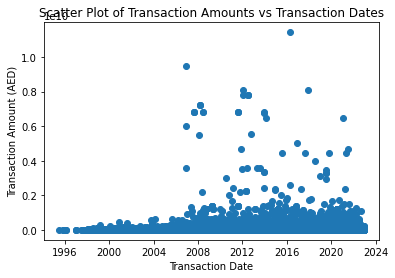

In [46]:
plt.scatter(tx_data['Transaction Date'], tx_data['Amount'])
plt.title('Scatter Plot of Transaction Amounts vs Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount (AED)')
plt.show()

In [47]:
fig = px.scatter(tx_data, x="Transaction Date", y="Amount", trendline="ols", color="Transaction Type")
fig.write_image("fig1.png")

In [48]:
fig = px.histogram(tx_data, x="Transaction Type")
fig.write_image("histogram1.png")

In [49]:
fig = px.scatter(tx_data, x="Amount", y="Transaction Size (sq.m)", trendline="ols", color="Transaction Type")
fig.write_image("fig2.png")

In [50]:
fig = px.box(tx_data, x="Property Sub Type", y="Amount")
#fig.update_traces(boxpoints=False) 
fig.write_image("fig3.png")

In [51]:
fig = px.box(tx_data, x="Property Type", y="Amount", color="Transaction Type", points="outliers")
#fig.update_traces(boxpoints=False)
fig.write_image("fig4.png")

In [52]:
tx_data['Property Sub Type'].unique()

array(['Residential', 'Commercial', 'Flat', 'Villa', 'Hotel Apartment',
       'Office', 'Residential Flats', 'N/A', 'Hotel Rooms', 'Unit',
       'General Use', 'Labor Camp', 'Shop', 'Agricultural', 'Industrial',
       'Government Housing', 'Land', 'Sports Club', 'Show Rooms',
       'Workshop', 'Warehouse', 'Petrol Station', 'Gymnasium', 'Clinic',
       'Airport', 'Sized Partition', 'Stacked Townhouses', 'School',
       'Building', 'Exhbition Center', 'Parking', 'Car Services', 'Hotel',
       'Consulate', 'Residential / Attached Villas', 'Shopping Mall',
       'Hospital', 'Plants shop', 'Rest Area', 'General Authority',
       'Organizations', 'General Services',
       'Residential / Residential Villa', 'Mosque',
       'Multi Store Parcking', 'Embassy',
       'Commercial / Offices / Residential', 'Store'], dtype=object)

In [14]:
tx_data['Property ID'].value_counts()

53492061      52
53491842      45
53491755      45
837486        40
312957        26
              ..
98306580       1
1094193396     1
98307384       1
93414087       1
246591         1
Name: Property ID, Length: 507504, dtype: int64

In [26]:
tx_data['Transaction Type'].str.get_dummies(prefix='txType').corrwith(tx_data.Amount, method='spearman')

Gifts       0.038540
Mortgage    0.014503
Sales      -0.028725
dtype: float64

In [88]:
tx_data['Transaction Type'].str.get_dummies()

,Gifts,Mortgage,Sales
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
995970,0,1,0
995971,0,1,0
995972,0,1,0
995973,0,1,0


In [93]:
df = pd.get_dummies(tx_data['Transaction Type'], prefix='txType')
pd.concat([tx_data, df], axis=1)

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project,txType_Gifts,txType_Mortgage,txType_Sales
0,13-7700-2022,2022-02-06 16:18:00,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,570400.0,174.80,174.80,N/A,N/A,N/A,N/A,Dubai Cycling Course,0,0,N/A,DAMAC HILLS (2) - ODORA,0,1,0
1,13-7699-2022,2022-02-06 16:14:00,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,530000.0,174.80,174.80,N/A,N/A,N/A,N/A,Dubai Cycling Course,0,0,N/A,DAMAC HILLS (2) - ZINNIA,0,1,0
2,14-563-2022,2022-02-06 15:42:00,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,Residential,500000.0,1188.42,1188.42,N/A,N/A,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0,0,N/A,N/A,0,1,0
3,11-12317-2022,2022-02-06 15:22:00,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,Commercial,1500000.0,600.51,600.51,N/A,N/A,N/A,N/A,N/A,1,1,N/A,N/A,0,0,1
4,11-12316-2022,2022-02-06 15:07:00,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,815000.0,112.24,112.24,N/A,N/A,N/A,N/A,Dubai Cycling Course,1,1,N/A,DAMAC HILLS (2) - AMARGO,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995970,13-1699-1996,1996-02-14 00:00:00,256488,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Manara,Land,Residential,500000.0,1393.55,1393.55,N/A,N/A,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Burj Al Arab,0,0,N/A,N/A,0,1,0
995971,13-1701-1996,1996-01-24 00:00:00,391611,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Satwa,Land,Residential,500000.0,1390.01,1390.01,N/A,N/A,Financial Centre,Dubai Mall,Burj Khalifa,0,0,N/A,N/A,0,1,0
995972,13-1742-1995,1995-10-26 00:00:00,216804,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Mezhar Second,Land,Residential,500000.0,1858.06,1858.06,N/A,N/A,Etisalat Metro Station,City Centre Mirdif,Dubai International Airport,0,0,N/A,N/A,0,1,0
995973,13-1746-1995,1995-10-18 00:00:00,536243421,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Goze First,Land,Residential,500000.0,929.03,929.03,N/A,N/A,Business Bay Metro Station,Dubai Mall,Downtown Dubai,0,0,N/A,N/A,0,1,0


In [27]:
tx_data['Transaction Type'].str.get_dummies().corrwith(tx_data.Amount)

Gifts       0.010476
Mortgage    0.039922
Sales      -0.042550
dtype: float64

In [18]:
tx_data['Transaction sub type'].value_counts()

Sale                                                320565
Sell - Pre registration                             252047
Mortgage Registration                               129946
Delayed Sell                                         77843
Lease to Own Registration                            53081
Grant                                                28995
Portfolio Mortgage Registration                      26984
Portfolio Mortgage Modification                      21459
Modify Mortgage                                      16115
Development Registration                             11014
Lease to Own Registration Pre-Registration            8375
Delayed Mortgage                                      7789
Sell Development                                      6979
Lease Finance Registration                            5817
Mortgage Pre-Registration                             5621
Development Mortgage                                  3825
Mortgage Transfer                                     30

In [63]:
tx_data_subType = tx_data['Transaction sub type'].str.get_dummies()
tx_data_subType.corrwith(tx_data.Amount, method='spearman')

Adding Land By Sell                                -0.019188
Delayed Development                                -0.023616
Delayed Lease to Own Modify                        -0.001257
Delayed Lease to Own Registration                   0.010944
Delayed Lease to Own Transfer                       0.000649
Delayed Mortgage                                    0.010500
Delayed Portfolio Mortgage                         -0.001873
Delayed Sell                                        0.150534
Delayed Sell Development                           -0.007138
Delayed Sell Lease to Own Registration              0.008530
Development Mortgage                                0.007706
Development Mortgage Pre-Registration              -0.001939
Development Registration                           -0.049252
Development Registration Pre-Registration          -0.049076
Grant                                               0.038745
Grant Development                                   0.000760
Grant Pre-Registration  

In [101]:
tx_data.corr(method='spearman')

,Property ID,Amount,Transaction Size (sq.m),Property Size (sq.m),No. of Buyer,No. of Seller,date
Property ID,1.000000,-0.069444,-0.279997,-0.290506,0.125015,0.079629,0.574962
Amount,-0.069444,1.000000,0.692829,0.686448,0.000726,-0.023746,0.048104
Transaction Size (sq.m),-0.279997,0.692829,1.000000,0.989824,-0.215793,-0.224313,-0.083802
Property Size (sq.m),-0.290506,0.686448,0.989824,1.000000,-0.219763,-0.229995,-0.083901
No. of Buyer,0.125015,0.000726,-0.215793,-0.219763,1.000000,0.837009,-0.107517
No. of Seller,0.079629,-0.023746,-0.224313,-0.229995,0.837009,1.000000,-0.119956
date,0.574962,0.048104,-0.083802,-0.083901,-0.107517,-0.119956,1.000000


In [100]:
tx_data.corr()

,Property ID,Amount,Transaction Size (sq.m),Property Size (sq.m),No. of Buyer,No. of Seller,date
Property ID,1.000000,-0.008693,0.004600,0.003711,0.000731,-0.006790,0.465706
Amount,-0.008693,1.000000,0.111802,0.155812,-0.004411,-0.004351,-0.006578
Transaction Size (sq.m),0.004600,0.111802,1.000000,0.873567,-0.000504,-0.000520,0.001291
Property Size (sq.m),0.003711,0.155812,0.873567,1.000000,-0.000470,-0.000489,-0.000140
No. of Buyer,0.000731,-0.004411,-0.000504,-0.000470,1.000000,0.939790,-0.019524
No. of Seller,-0.006790,-0.004351,-0.000520,-0.000489,0.939790,1.000000,-0.027495
date,0.465706,-0.006578,0.001291,-0.000140,-0.019524,-0.027495,1.000000


In [53]:
r, p = scipy.stats.pearsonr(tx_data.Amount, tx_data['Property Size (sq.m)'])
print(r, p)

r, p = scipy.stats.spearmanr(tx_data.Amount, tx_data['Property Size (sq.m)'])
print(r, p)

r, p = scipy.stats.pearsonr(tx_data.Amount, tx_data['Transaction Size (sq.m)'])
print(r, p)

r, p = scipy.stats.spearmanr(tx_data.Amount, tx_data['Transaction Size (sq.m)'])
print(r, p)

0.15581219938419438 0.0
0.6864483393564621 0.0
0.11180201133892699 0.0
0.6928285493790055 0.0


In [5]:
r, p = scipy.stats.spearmanr(tx_data.Amount, tx_data_subType['Delayed Sell'])
print(r, p)

r, p = scipy.stats.spearmanr(tx_data.Amount, tx_data_subType['Sell - Pre registration'])
print(r, p)

NameError: name 'tx_data_subType' is not defined

In [7]:
from sklearn.model_selection import train_test_split

In [18]:
tx_data

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project,date
0,13-7700-2022,2022-02-06 16:18:00,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,570400.0,174.80,174.80,N/A,N/A,N/A,N/A,Dubai Cycling Course,0,0,N/A,DAMAC HILLS (2) - ODORA,1644164280000000000
1,13-7699-2022,2022-02-06 16:14:00,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,530000.0,174.80,174.80,N/A,N/A,N/A,N/A,Dubai Cycling Course,0,0,N/A,DAMAC HILLS (2) - ZINNIA,1644164040000000000
2,14-563-2022,2022-02-06 15:42:00,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,Residential,500000.0,1188.42,1188.42,N/A,N/A,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0,0,N/A,N/A,1644162120000000000
3,11-12317-2022,2022-02-06 15:22:00,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,Commercial,1500000.0,600.51,600.51,N/A,N/A,N/A,N/A,N/A,1,1,N/A,N/A,1644160920000000000
4,11-12316-2022,2022-02-06 15:07:00,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,815000.0,112.24,112.24,N/A,N/A,N/A,N/A,Dubai Cycling Course,1,1,N/A,DAMAC HILLS (2) - AMARGO,1644160020000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995970,13-1699-1996,1996-02-14 00:00:00,256488,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Manara,Land,Residential,500000.0,1393.55,1393.55,N/A,N/A,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Burj Al Arab,0,0,N/A,N/A,824256000000000000
995971,13-1701-1996,1996-01-24 00:00:00,391611,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Satwa,Land,Residential,500000.0,1390.01,1390.01,N/A,N/A,Financial Centre,Dubai Mall,Burj Khalifa,0,0,N/A,N/A,822441600000000000
995972,13-1742-1995,1995-10-26 00:00:00,216804,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Mezhar Second,Land,Residential,500000.0,1858.06,1858.06,N/A,N/A,Etisalat Metro Station,City Centre Mirdif,Dubai International Airport,0,0,N/A,N/A,814665600000000000
995973,13-1746-1995,1995-10-18 00:00:00,536243421,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Goze First,Land,Residential,500000.0,929.03,929.03,N/A,N/A,Business Bay Metro Station,Dubai Mall,Downtown Dubai,0,0,N/A,N/A,813974400000000000


In [19]:
y = tx_data["Amount"]
x = tx_data.drop(["Amount",'Transaction Date'], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [21]:
from interpret.glassbox import ExplainableBoostingRegressor
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor()

In [22]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [ ]:
from interpret import show
show(ebm.explain_global())

In [ ]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)